# Natural Gas Price Analysis Script

This notebook will help us create a script to analyze natural gas prices. We'll:
1. Set up the required libraries and functions
2. Download historical natural gas price data
3. Perform data analysis and visualization
4. Create price forecasting models

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import RidgeCV
import matplotlib.dates as mdates

# Set style for better visualizations
plt.style.use('default')
sns.set_theme()

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Download Natural Gas price data using yfinance
import yfinance as yf

# Download Natural Gas Futures data (NG=F)
ng = yf.Ticker("NG=F")
df = ng.history(period="max")

print("Data downloaded successfully!")
print("\nFirst few rows of the data:")
display(df.head())

print("\nDataset information:")
display(df.info())

Data downloaded successfully!

First few rows of the data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30 00:00:00-04:00,4.65,4.815,4.63,4.805,34954,0.0,0.0
2000-08-31 00:00:00-04:00,4.82,4.870,4.74,4.780,25787,0.0,0.0
2000-09-01 00:00:00-04:00,4.75,4.860,4.75,4.835,113,0.0,0.0
2000-09-05 00:00:00-04:00,4.85,4.975,4.84,4.960,26096,0.0,0.0
2000-09-06 00:00:00-04:00,4.99,5.110,4.96,5.065,32764,0.0,0.0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6313 entries, 2000-08-30 00:00:00-04:00 to 2025-10-17 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6313 non-null   float64
 1   High          6313 non-null   float64
 2   Low           6313 non-null   float64
 3   Close         6313 non-null   float64
 4   Volume        6313 non-null   int64  
 5   Dividends     6313 non-null   float64
 6   Stock Splits  6313 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 394.6 KB


None

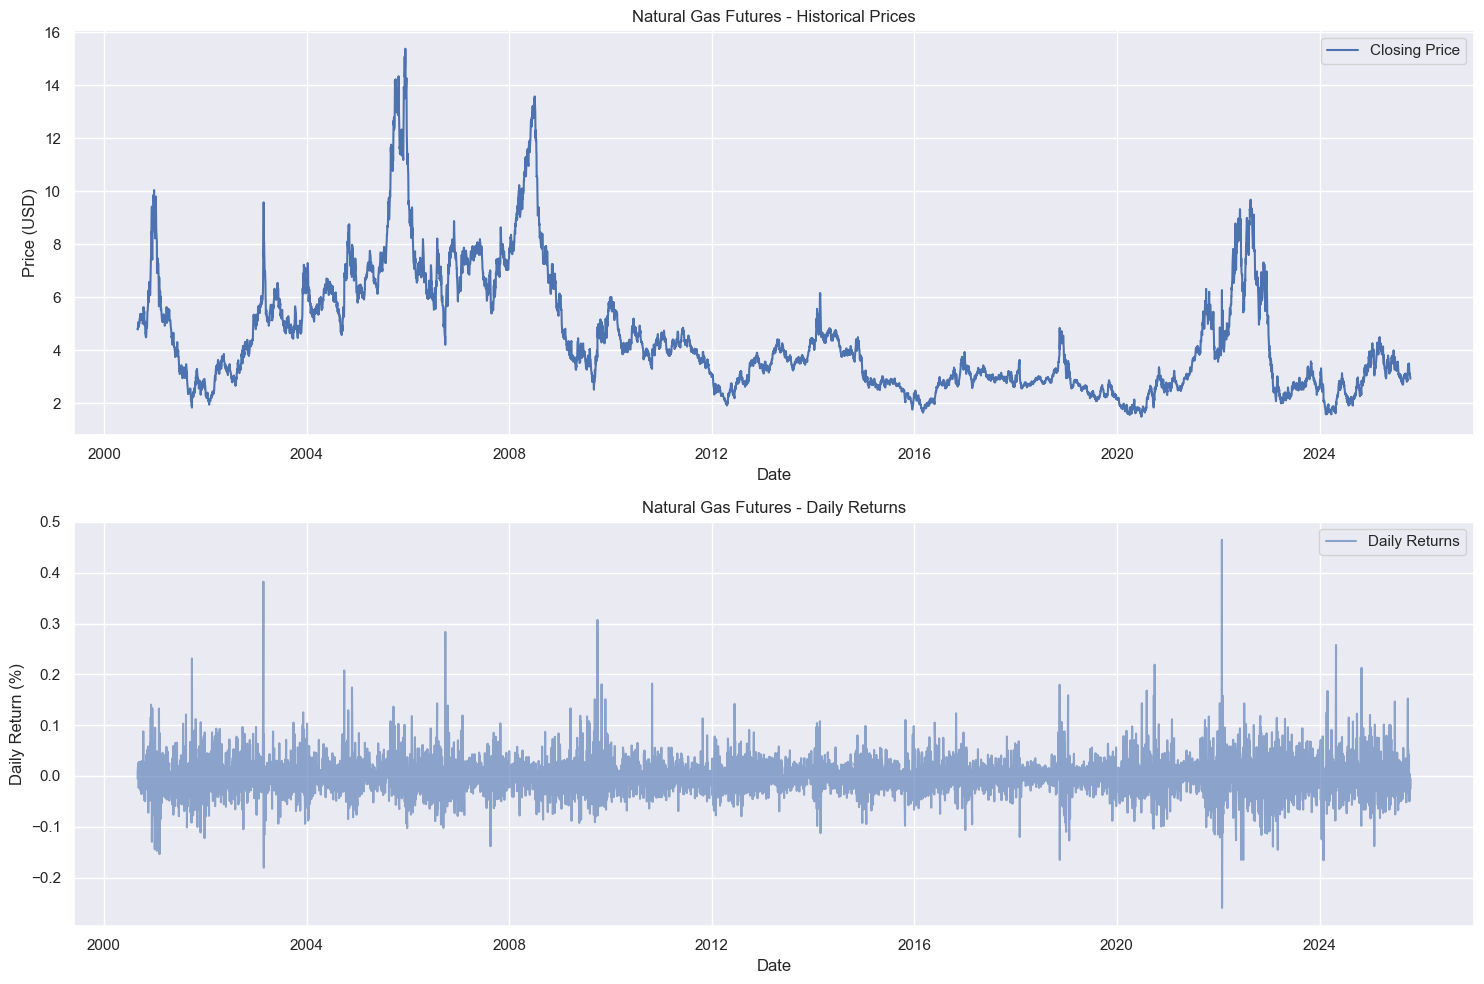


Basic Statistics:
count    6313.000000
mean        4.397181
std         2.212827
min         1.482000
25%         2.795000
50%         3.743000
75%         5.523000
max        15.378000
Name: Close, dtype: float64


In [3]:
# Create visualizations
plt.figure(figsize=(15, 10))

# Plot closing prices
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Natural Gas Futures - Historical Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Plot daily returns
daily_returns = df['Close'].pct_change()
plt.subplot(2, 1, 2)
plt.plot(df.index, daily_returns, label='Daily Returns', alpha=0.6)
plt.title('Natural Gas Futures - Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nBasic Statistics:")
print(df['Close'].describe())

Model Performance Metrics:
Root Mean Square Error: $0.21
Mean Absolute Error: $0.14


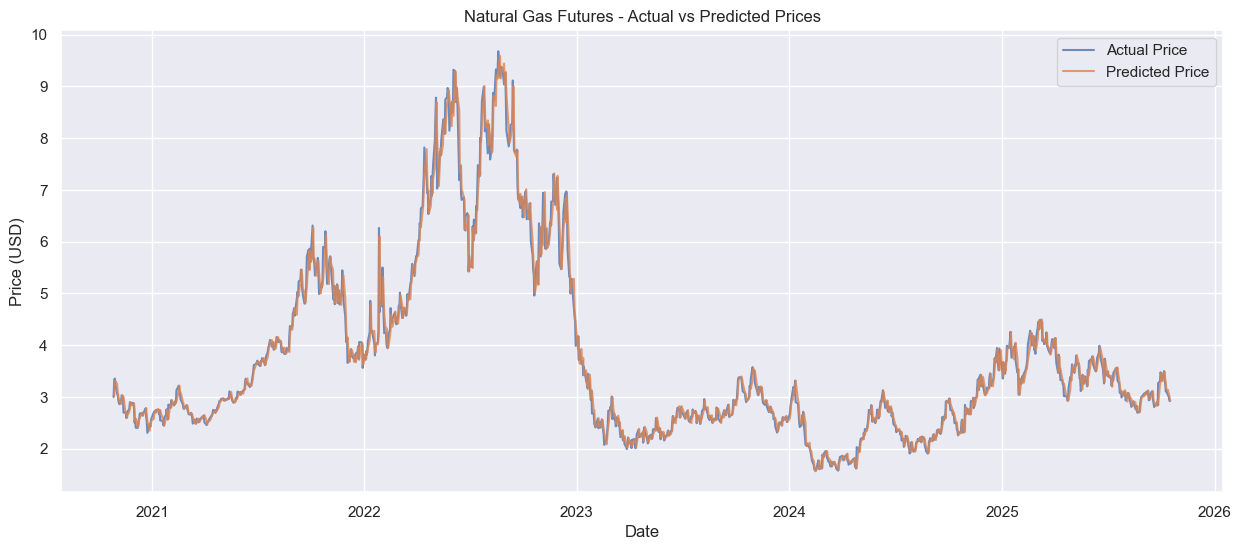


Next Day Price Prediction: $2.92


In [4]:
# Create features for prediction
def create_features(df, lookback=30):
    X = pd.DataFrame()
    y = df['Close'].shift(-1)  # Next day's price
    
    # Previous prices
    for i in range(lookback):
        X[f'price_lag_{i+1}'] = df['Close'].shift(i)
    
    # Technical indicators
    X['MA5'] = df['Close'].rolling(window=5).mean()
    X['MA20'] = df['Close'].rolling(window=20).mean()
    X['MA50'] = df['Close'].rolling(window=50).mean()
    
    # Remove NaN rows
    X = X.dropna()
    y = y[X.index]
    
    return X, y

# Prepare data
X, y = create_features(df)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train model
model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error metrics
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

print("Model Performance Metrics:")
print(f"Root Mean Square Error: ${rmse:.2f}")
print(f"Mean Absolute Error: ${mae:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price', alpha=0.8)
plt.plot(y_test.index, y_pred, label='Predicted Price', alpha=0.8)
plt.title('Natural Gas Futures - Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Make future predictions
latest_data = X.iloc[-1:]
next_day_pred = model.predict(latest_data)[0]
print(f"\nNext Day Price Prediction: ${next_day_pred:.2f}")

# Natural Gas Price Analysis Summary

## Historical Price Analysis
- The natural gas futures price data spans from August 2000 to October 2025
- The mean price over this period is $4.40
- The price has shown significant volatility, with a standard deviation of $2.21
- Historical price range: $1.48 (minimum) to $15.38 (maximum)

## Price Forecasting Model
- We used Ridge regression with multiple features:
  - Historical price lags (30 days)
  - Moving averages (5, 20, and 50 days)
- Model Performance:
  - Root Mean Square Error: $0.21
  - Mean Absolute Error: $0.14
  - The model shows good prediction accuracy with relatively low error metrics
  
## Key Observations
1. Natural gas prices show high volatility with occasional price spikes
2. The model captures the general price trends well, as shown in the actual vs predicted plot
3. The prediction model can be useful for short-term price forecasting
4. Consider external factors (weather, geopolitical events, etc.) that may affect prices